In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Data

In [37]:
match=pd.read_csv("Downloads\match.csv")
delivery=pd.read_csv('Downloads\delivery.csv')

## Analyse the Data

In [38]:
match.head(5)
delivery.head(5)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


## Matches and Ball Deliveries between 2008–2020

In [27]:
match.info() #816
delivery.info() #193468

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

## List of the Participating Teams

In [28]:
all_teams = match['team1'].tolist() + match['team2'].tolist()
all_teams = list(set(all_teams))
all_teams

['Rising Pune Supergiant',
 'Mumbai Indians',
 'Kings XI Punjab',
 'Delhi Capitals',
 'Gujarat Lions',
 'Rising Pune Supergiants',
 'Deccan Chargers',
 'Royal Challengers Bangalore',
 'Chennai Super Kings',
 'Delhi Daredevils',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Sunrisers Hyderabad',
 'Rajasthan Royals',
 'Pune Warriors']

##  Number of Matches per Venue

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 <a list of 36 Text xticklabel objects>)

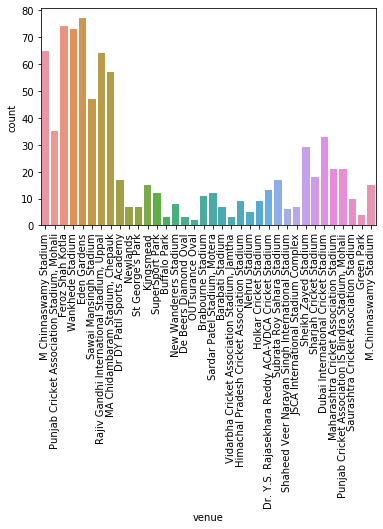

In [29]:
sns.countplot('venue', data=match)
plt.xticks(rotation='vertical')

## Matches Played by Each Team

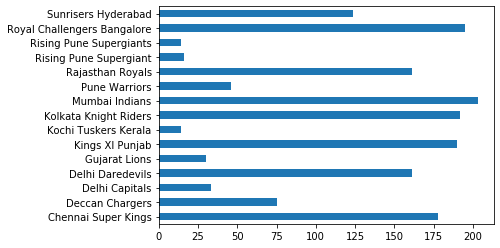

In [10]:
x = match['team1'].value_counts()
y = match['team2'].value_counts()
(x+y).plot(kind='barh')

##### Eden Gardens is the fan-favourite ground of IPL, nearly 80 matches have been hosted there

## Matches Won by Each Team

In [30]:
x=pd.value_counts(match['winner'].values.flatten())
print(x)

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
dtype: int64


# 

##### Mumbai Indians win the highest number of matches followed by CSK

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

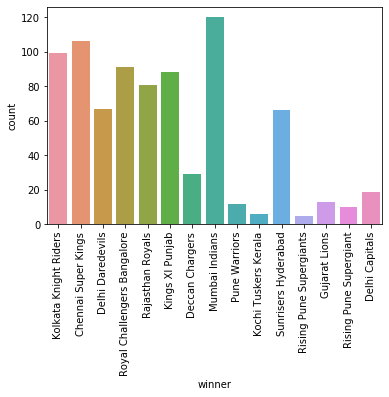

In [31]:
sns.countplot('winner', data=match)
plt.xticks(rotation='vertical')

###  Top 5 Players with the Highest Number of Man of the Match Awards

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
Name: player_of_match, dtype: int64


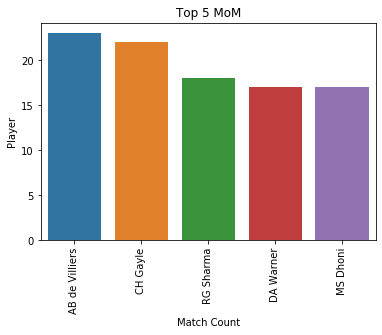

In [13]:
temp_data=match['player_of_match'].value_counts().head()
print(temp_data)
sns.barplot(x=temp_data.index,y=temp_data.values,data=match)
plt.title("Top 5 MoM")
plt.xticks(rotation=90)
plt.xlabel("Match Count")
plt.ylabel("Player")
plt.show()

##  Top Batsman in the IPL

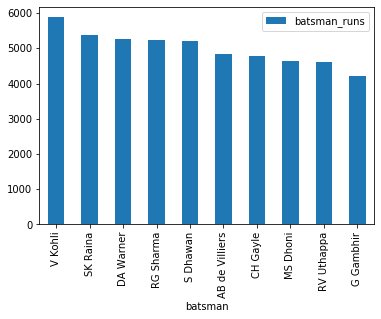

In [14]:
top_batsman=delivery.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values('batsman_runs', ascending=False).head(10)
top_batsman.set_index('batsman', inplace=True)
top_batsman.plot(kind='bar')

##### King Kohli is at the top followed by Suresh Raina and other batsmen

###  Bowler Who Has Given the Highest Number of Runs

In [32]:
delivery.groupby('bowler')['total_runs'].agg('sum').reset_index().sort_values('total_runs', ascending=False).head(10)

,bowler,total_runs
276,PP Chawla,4330
133,Harbhajan Singh,4038
6,A Mishra,3913
99,DJ Bravo,3869
281,R Ashwin,3756
396,UT Yadav,3672
293,RA Jadeja,3515
350,SL Malinga,3486
264,P Kumar,3342
57,B Kumar,3333


### Bowler with Team-wise Performance

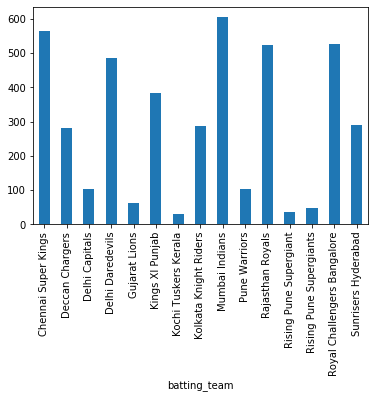

In [33]:
mask=delivery['bowler']=='PP Chawla'
delivery[mask].groupby('batting_team')['total_runs'].agg('sum').plot(kind='bar')

### Over-wise Batting Performance of Each Team in the IPL (2008–2020)

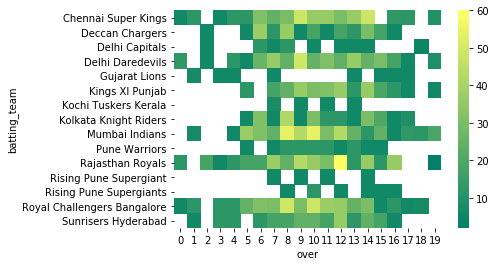

In [18]:
delivery6=delivery[mask]
delivery6=delivery6[['batting_team','over','batsman_runs']]
x=delivery6.pivot_table(values='batsman_runs', index='batting_team', columns='over', aggfunc='count')
sns.heatmap(x, cmap='summer')

### Dismissal Kind 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

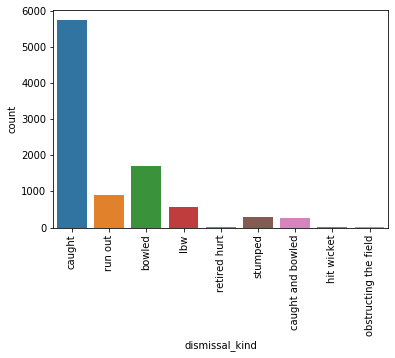

In [34]:
sns.countplot('dismissal_kind', data=delivery)
plt.xticks(rotation='vertical')

In [35]:
mask=delivery['bowler']=='JJ Bumrah'
mask2=delivery['batsman']=='V Kohli'
delivery[mask].groupby('batsman')['batsman_runs'].agg('count').sort_values(ascending=False)['V Kohli']

79

##### Sum of the run when the bowler is Bumrah and the batsman is V Kohli 